# 山河事件簿分析工具
riverlog_for_gis.py 需要在同一個目錄

文件請參閱:

https://docs.google.com/document/d/1iM_-YdZ8LFFbPkcL-4Irp9Z0laTXgUL2MzfwE4SWtFQ/edit#heading=h.lumlll4mf62a

所有 API 下載範例程式法，下載成 CSV
```
        api_to_csv("rain-dailySum",[2020])
        api_to_csv("rain-10minSum",["2020-09-01"])
        api_to_csv("rain-station",None)
        api_to_csv("rain-rainData",["2020-09-01","23","24","121","122"])
        api_to_csv("waterLevel-station",None)
        api_to_csv("waterLevel-waterLevelData",["2020-09-01","23","24","121","122"])
        api_to_csv("waterLevelDrain-station",None)
        api_to_csv("waterLevelDrain-waterLevelDrainData",["2019-12-03","23","24","120","122"])
        api_to_csv("waterLevelAgri-station",None)
        api_to_csv("waterLevelAgri-waterLevelAgriData",["2019-12-03","23","24","120","122"])
        api_to_csv("sewer-station",None)
        api_to_csv("sewer-sewerData",["2019-12-02","24","25","121","122"])
        api_to_csv("tide-station",None)
        api_to_csv("tide-tideData",["2020-09-01","23","24","121","122"])
        api_to_csv("pump-station",None)
        api_to_csv("pump-pumpData",["2019-12-03","25","26","121","122"])
        api_to_csv("reservoir-info",None)
        api_to_csv("reservoir-reservoirData",["2020-09-01"])
        api_to_csv("flood-station",None)
        api_to_csv("flood-floodData",["2020-09-01"])
        api_to_csv("alert-alertData",["2020-09-01"])
        api_to_csv("alert-alertStatistic",[2020])
        api_to_csv("alert-typhoonData",["2020-09-01"])
        api_to_csv("elev-gridData",["7","23","24","120","121"])
        api_to_csv("statistic-waterUseAgriculture",None)
        api_to_csv("statistic-waterUseCultivation",None)
        api_to_csv("statistic-waterUseLivestock",None)
        api_to_csv("statistic-waterUseLiving",None)
        api_to_csv("statistic-waterUseIndustry",None)
        api_to_csv("statistic-waterUseOverview",None)
        api_to_csv("statistic-monthWaterUse",None)
        api_to_csv("statistic-reservoirUse",None)
        api_to_csv("statistic-reservoirSiltation",None)
```

# Init All

In [32]:
from riverlog_for_gis import * 
from datetime import date

gd = {}

def get_value_by_index(df,keyvalue, target_col):
    """
    find df's column(key) = value, return value of target_col
    keyvalue: col_name=value
    """
    cols = keyvalue.split("=")
    if len(cols)!=2:
        return ""
    keyvalue_key = cols[0]
    keyvalue_value = cols[1]
    if not target_col in df.columns:
        return ""
    values = df[df[keyvalue_key]==keyvalue_value][target_col].values.tolist()
    if len(values)>0:
        value = values[0]
    else:
        value = ""
    return value

# 多水庫庫容百分比分析
## Get/Load Data
需要的時間範圍可以在此設定

In [26]:
def reservoir_load(bag,date_start, date_end):
    df_info = api_to_csv("reservoir-info",None)
    filename=api_to_csv_range(date_start,date_end,"reservoir-reservoirData",None,"ObservationTime")
    dest_name="%s_GMT8.csv" %(filename[:-4])
    df=csv_add_gmt8(filename,"ObservationTime", dest_name )

    #handle info
    df_info=df_info[df_info['Year']==105]
    df_info.drop_duplicates(subset="id")
    df_info["id"] = pd.to_numeric(df_info["id"])

    #merge/filter
    df2=df.merge(df_info, how='left', left_on='ReservoirIdentifier', right_on='id')
    df2=df2.drop_duplicates(subset=["ObservationTime","ReservoirIdentifier"],keep='last')
    df2=df2[df2['ReservoirIdentifier'].isin([10405,10201,10205])] #,20101,20201

    #Calculate, Pivot
    df2["ObservationTimeGMT8"] = pd.to_datetime(df2['ObservationTimeGMT8'])
    df2['percent']=df2['EffectiveWaterStorageCapacity']/df2['EffectiveCapacity']*100
    df2=df2[df2['percent']<=100]
    df3 = df2.pivot(index='ObservationTimeGMT8', columns='ReservoirName', values='percent')
    
    bag['reservoir-info']=df_info
    bag['reservoir-reservoirData']=df2
    bag['reservoir_pivot']=df3

def reservoir_plot(bag):
    #plot
    %matplotlib notebook
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties
    myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
    df = bag['reservoir_pivot']
    df.plot()
    plt.title("多水庫2021庫容比例",fontproperties=myfont) 
    plt.legend(prop=myfont)
    plt.xticks(fontname = 'SimSun',size=8)
    plt.yticks(fontname = 'SimSun',size=8)
    plt.xlabel('時間',fontproperties=myfont)
    plt.ylabel('百分比',fontproperties=myfont)
    plt.show

reservoir-info: output/reservoir-info.csv saved, shape = (152, 22)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-01.csv saved, shape = (274, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-02.csv saved, shape = (296, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-03.csv saved, shape = (304, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-04.csv saved, shape = (310, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-05.csv saved, shape = (318, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-06.csv saved, shape = (321, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-07.csv saved, shape = (321, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-08.csv saved, shape = (322, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-09.csv saved, shape = (301, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-01-10.csv saved, 

reservoir-reservoirData: output/reservoir-reservoirData_2021-04-04.csv saved, shape = (318, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-05.csv saved, shape = (306, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-06.csv saved, shape = (322, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-07.csv saved, shape = (322, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-08.csv saved, shape = (322, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-09.csv saved, shape = (323, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-10.csv saved, shape = (305, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-11.csv saved, shape = (305, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-12.csv saved, shape = (323, 4)
reservoir-reservoirData: output/reservoir-reservoirData_2021-04-13.csv saved, shape = (303, 4)
reservoir-reservoirData: output/reservoir-reservoi

<IPython.core.display.Javascript object>


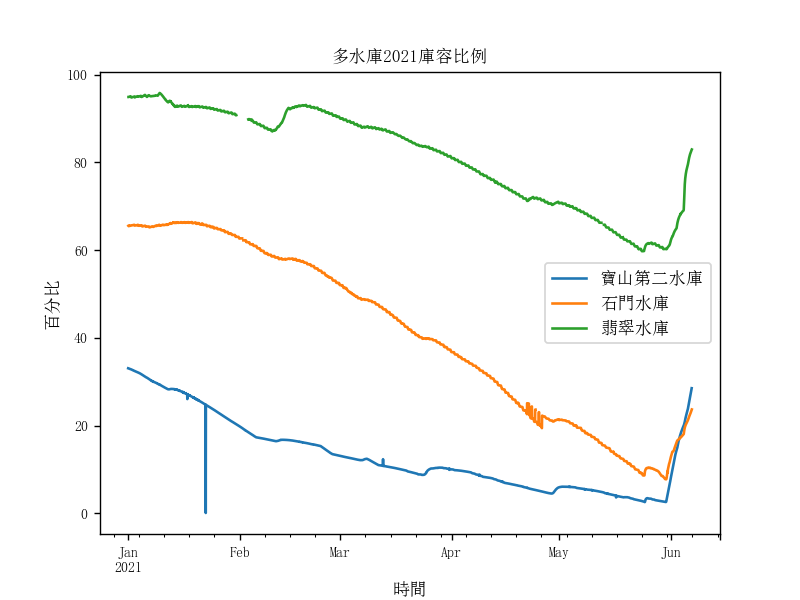

In [27]:
reservoir_load(gd,"2021-01-01","2021-06-06")
reservoir_plot(gd)

# 今日淹水

可看今天有哪些測站有淹過水
需要預先準備的測站縣市資訊，在同目錄的 flood-station_縣市鄉鎮.csv，準備方式請參考文件

In [247]:
def flood_load(bag,date_str):
    
    #load 測站縣市補充資料
    df_info_縣市鄉鎮 = pd.read_csv("flood-station_縣市鄉鎮.csv")

    #get data, process
    df_info=api_to_csv("flood-station",None)
    df_info=df_info.merge(df_info_縣市鄉鎮, how='left', left_on='_id', right_on='_id')
    df_info

    #date_str = date.today() # 2021-06-07
    print("Today is %s" %(date_str))
    df = api_to_csv("flood-floodData",[date_str])

    df["timeGMT8"] = df['time'].apply(date_to_gmt8)
    df["timeGMT8"] = pd.to_datetime(df['timeGMT8'])

    df=df.merge(df_info_縣市鄉鎮, how='left', left_on='stationID', right_on='_id')
    df=df.drop_duplicates(subset=["time","stationName"],keep='last')   
    df['stationName_city']=df['COUNTYNAME']  + '|' + df['TOWNNAME']  + '|' +  df['stationName']

    #filter, sort
    df=df[df['value']>5] #可改淹水高度, 有很多淹水資料時，改高一點比較不會太多
    df.sort_values(by=['timeGMT8'])
    
    bag['flood-station_縣市鄉鎮']=df_info_縣市鄉鎮
    bag['flood-station']=df_info
    bag['flood-floodData']=df

def flood_plot(bag):
    %matplotlib notebook

    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties
    
    df = bag['flood-floodData']
    
    myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
    df2 = df.pivot(index='timeGMT8', columns='stationName_city', values='value')
    df2.plot(style='.-')
    title = "今日 %s 淹水感測器淹水值" %(date.today())
    plt.title(title,fontproperties=myfont) 
    plt.legend(prop=myfont)
    plt.xticks(fontname = 'SimSun',size=8)
    plt.yticks(fontname = 'SimSun',size=8)
    plt.xlabel('時間',fontproperties=myfont)
    plt.ylabel('公分',fontproperties=myfont)
    fig = plt.gcf()
    fig.set_size_inches(8.5, 4.5)
    plt.show

    #淹水測站列表
def flood_list(bag):
    df = bag['flood-floodData']
    ary = df['stationName_city'].unique()
    for name in ary:
        print(name)

flood-station: output/flood-station.csv saved, shape = (1269, 4)
Today is 2021-06-05
flood-floodData: output/flood-floodData_2021-06-05.csv saved, shape = (47309, 3)


<IPython.core.display.Javascript object>


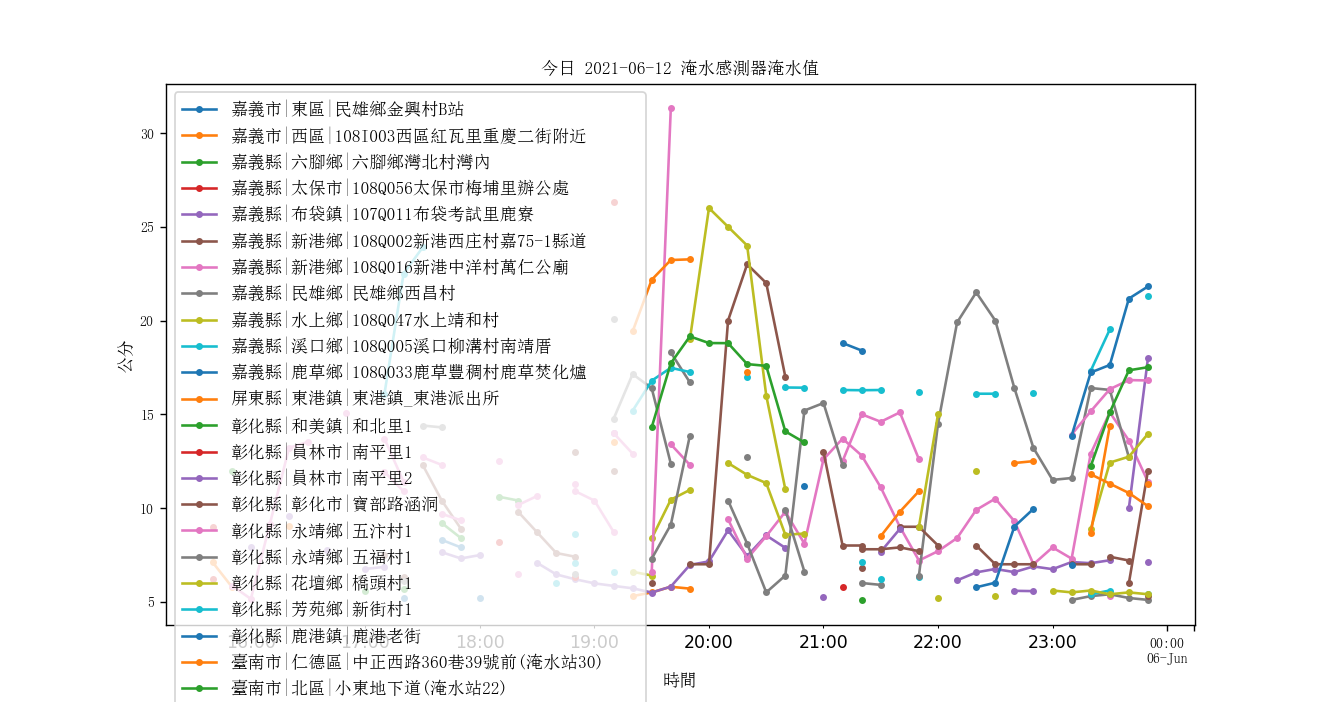

In [248]:
flood_load(gd,'2021-06-05')
flood_plot(gd)
#flood_list(gd)

# 雨量站相關

In [251]:

#列出新竹市測站
def rain_station_view():
    df_info = api_to_csv("rain-station",None)
    filter_city = df_info['city']=='新竹縣'
    df_info = df_info[filter_city]

    return df_info


def rain_load(bag, date_str,limit=0,reload=False):
    df_info = api_to_csv("rain-station",None)
    #date_str = date.today() # 2021-06-07
    print("Today is %s" %(date_str))
    df=api_to_csv("rain-rainData",[date_str,"20","26","120","122"],reload)

    df["timeGMT8"] = df['time'].apply(date_to_gmt8)
    df["timeGMT8"] = pd.to_datetime(df['timeGMT8'])

    df=df.merge(df_info, how='left', left_on='stationID', right_on='stationID')
    df=df.drop_duplicates(subset=["timeGMT8","stationID"],keep='last')   
    df['stationName']=df['city']  + '|' + df['town']  + '|' +  df['name'] + '|' + df['stationID']

    #filter, sort
    df=df[df['now']>=limit] #可改雨量值, 有很多淹水資料時，改高一點比較不會太多
    df=df.sort_values(by=['timeGMT8','stationID'])
    
    bag['rain-station']=df_info
    bag['rain-rainData']=df
#今日雨量 pivot    
def rain_plot(bag,date_str):
    %matplotlib notebook
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties
    
    df = bag['rain-rainData']
    
    myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
    df2 = df.pivot(index='timeGMT8', columns='stationName', values='now')
    df2.plot(style='.-')
    title = "今日 %s 雨量站值" %(date_str)
    plt.title(title,fontproperties=myfont) 
    plt.legend(prop=myfont)
    plt.xticks(fontname = 'SimSun',size=8)
    plt.yticks(fontname = 'SimSun',size=8)
    plt.xlabel('時間',fontproperties=myfont)
    plt.ylabel('mm',fontproperties=myfont)
    fig = plt.gcf()
    fig.set_size_inches(8.5, 4.5)
    plt.show 
    
def rain_hourdiff(bag, time_set,station_city):
    #時雨量
    df_info = gd['rain-station']
    df = gd['rain-rainData']

    #df_info.head()
    f1=df_info['city'].isin(station_city)
    #df_info[f1].values.tolist()
    #df_info[f1]['city'].unique()
    stations = df_info[f1]['stationID'].tolist()
    #print(stations)

    #df.head()
    #time_set=['2021-06-10 15:00:00','2021-06-10 16:00:00']
    f_time=df['timeGMT8'].isin(time_set)
    f_station=df['stationID'].isin(stations)
    df_f = df[f_station & f_time]
    #df[f_station]
    #df['city'].unique()

    df_pivot = df_f.pivot(index='stationName', columns='timeGMT8', values='now')
    df_pivot['rain_1hour']=df_pivot[time_set[1]]-df_pivot[time_set[0]] 
    bag['rain-hourdiff']=df_pivot

def to_slot_10min(t_src):
    #t_now = datetime.now()
    #t_added = timedelta(minutes = 10)
    #t_slot= t_src - t_added
    slot_min=int(int(t_src.minute/10)*10)
    date_str="%i-%i-%i %i:%02i:00" %(t_src.year,t_src.month,t_src.day,t_src.hour,slot_min)
    return date_str

def get_2slot(t_src,hour):
    #print("t_src=%s" %(t_src))
    date_str = to_slot_10min(t_src)

    date_obj = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
    date_obj2 = date_obj + timedelta(hours = hour)
    date_str2 = date_obj2.strftime("%Y-%m-%d %H:%M:%S")
    
    return [date_str,date_str2]

def rain_alarm_hour(bag,station_city,limit):
    rain_load(gd, date.today(),True)

    #time_set=['2021-06-10 15:00:00','2021-06-10 16:00:00']
    time_now = datetime.now()
    time_set = get_2slot(time_now-timedelta(minutes = 80),1)
    #print(time_set)
    #station_city=['新竹縣','新竹市']
    rain_hourdiff(gd,time_set,station_city)
    df_pivot = gd['rain-hourdiff']

    df_pivot=df_pivot[df_pivot['rain_1hour']>limit]
    df_pivot=df_pivot.sort_values(by=['rain_1hour'],ascending=False)
    
    print("-----\nMonitor time: %s : %s 雨量站時雨量 > %i mm -----\n" %(time_now.strftime("%Y-%m-%d %H:%M:%S"), station_city,limit))
    print(df_pivot) 
    
def rain_day_max(bag,date_str,station_city):
    rain_load(bag, date_str,True)
    #station_city=['新竹縣','新竹市']

    df_info = gd['rain-station']
    df = gd['rain-rainData']

    #df_info.head()
    f1=df_info['city'].isin(station_city)
    #df_info[f1].values.tolist()
    #df_info[f1]['city'].unique()
    stations = df_info[f1]['stationID'].tolist()  
    
    #f_time=df['timeGMT8'].isin(time_set)
    f_station=df['stationID'].isin(stations)
    df_f = df[f_station]
    
    
    df_agg=df_f.groupby('stationName').agg({'now': ['max']})  
    bag['rain_day_max']=df_agg





rain-station: output/rain-station.csv saved, shape = (2149, 6)
Today is 2021-06-12
rain-rainData: output/rain-rainData_2021-06-12.csv saved, shape = (55155, 3)


<IPython.core.display.Javascript object>


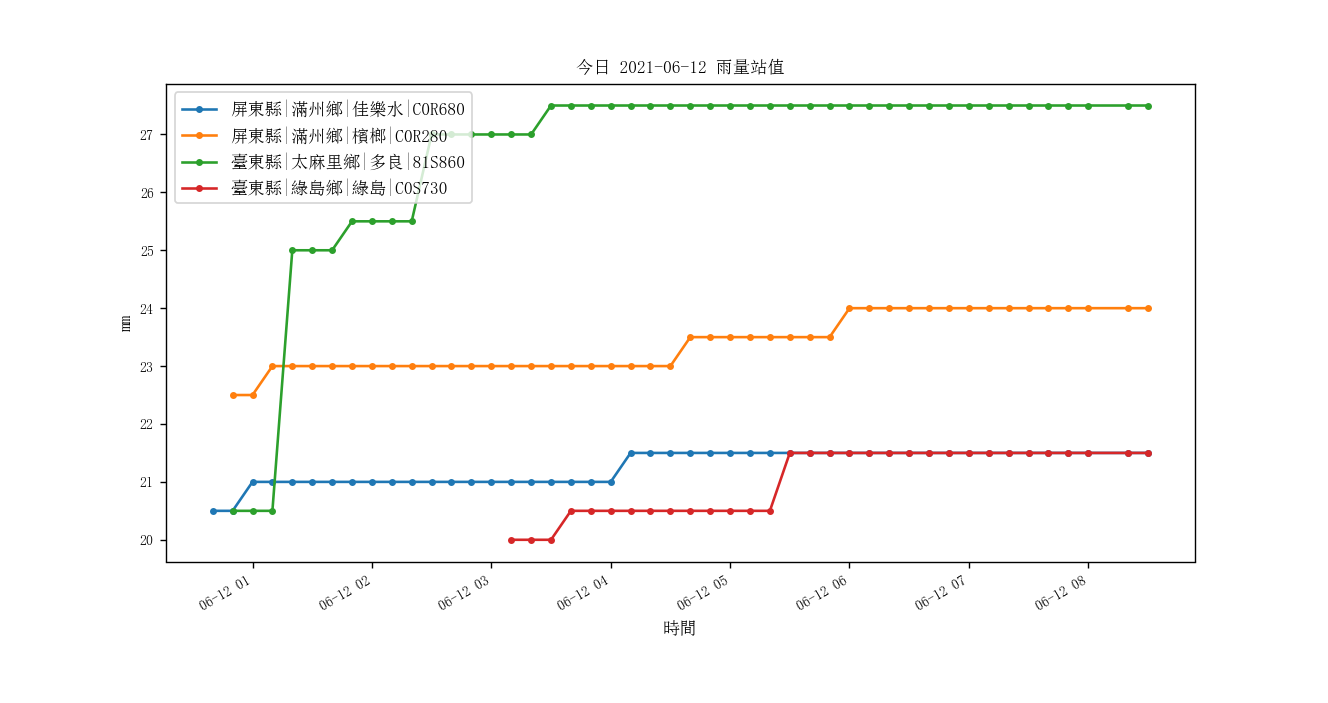

In [253]:
#rain_station_view()
rain_load(gd, date.today(),20,True)

rain_plot(gd,date.today())

if 0:
    #time_set=['2021-06-10 15:00:00','2021-06-10 16:00:00']
    time_set = get_2slot(datetime.now()-timedelta(minutes = 80),1)
    print(time_set)
    station_city=['新竹縣','新竹市']
    rain_hourdiff(gd,time_set,station_city)
    df_pivot = gd['rain-hourdiff']

    df_pivot=df_pivot[df_pivot['rain_1hour']>0]
    df_pivot=df_pivot.sort_values(by=['rain_1hour'],ascending=False)
    print(df_pivot)
    
if 0:
    #今日雨量
    rain_day_max(gd,date.today(),['臺東縣'])  
    df_agg=gd['rain_day_max']
    print(df_agg.sort_values([('now', 'max')], ascending=False).head())



# Monitor

In [239]:
#Alarm 時雨量監控
station_city=['臺東縣','屏東縣']
while True:
    #print(datetime.now())
    rain_alarm_hour(gd,station_city,1)
    time.sleep(600)


rain-station: output/rain-station.csv saved, shape = (2149, 6)
Today is 2021-06-12
rain-rainData: output/rain-rainData_2021-06-12.csv saved, shape = (51897, 3)
-----
Monitor time: 2021-06-12 08:28:04 : ['臺東縣', '屏東縣'] 雨量站時雨量 > 1 mm -----

Empty DataFrame
Columns: [2021-06-12 07:00:00, 2021-06-12 08:00:00, rain_1hour]
Index: []


KeyboardInterrupt: 

# 水位站

In [36]:
#查水位站
#常用站點 '河川水位測站-內灣-1300H013','河川水位測站-經國橋-1300H017' , '河川水位測站-上坪-1300H014'
def waterLevel_view():
    df_info = api_to_csv("waterLevel-station",None) #'BasinIdentifier',ObservatoryName
    filter_river = df_info['RiverName']=='上坪溪'
    #filter_name = df_info['BasinIdentifier']=='1300H017'

    # ID 查名稱
    #value=get_value_by_index(df_info,"BasinIdentifier=1140H037", 'ObservatoryName')
    value=get_value_by_index(df_info,"ObservatoryName=河川水位測站-內灣-1300H013", 'BasinIdentifier')
    print(value)

    return df_info[filter_river]

#準備今天的資料
def waterLevel_load(bag,date_str,reload=False):
    df_info = api_to_csv("waterLevel-station",None) #'BasinIdentifier',ObservatoryName

    #date_str=date.today() #2021-06-08
    #date_str='2021-06-08'

    df=api_to_csv("waterLevel-waterLevelData",[date_str,"23","25","120","123"],reload) #'RecordTime', 'StationIdentifier', 'WaterLevel'


    df["RecordTimeGMT8"] = df['RecordTime'].apply(date_to_gmt8)
    df["RecordTimeGMT8"] = pd.to_datetime(df['RecordTimeGMT8'])

    df=df.merge(df_info, how='left', left_on='StationIdentifier', right_on='BasinIdentifier')
    df=df.drop_duplicates(subset=["RecordTimeGMT8","StationIdentifier"],keep='last')   
    df['stationName']=df['StationIdentifier']  + '|' + df['ObservatoryName'] 

    #filter, sort
    df=df[df['WaterLevel']>0] #可改水位值, 有很多淹水資料時，改高一點比較不會太多

    df=df.sort_values(by=['RecordTimeGMT8','StationIdentifier'])
    
    bag['waterLevel-station']=df_info
    bag['waterLevel-waterLevelData']=df
    
#畫單站圖表
def waterLevel_plotA(bag, StationId):
    %matplotlib notebook
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties
    
    df = bag['waterLevel-waterLevelData']
    filter_river = df['StationIdentifier']==StationId
    #filter_river = df['RiverName'].str.contains('頭前溪', na=False)
    
    df = df[filter_river] 

    myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
    df2 = df.pivot(index='RecordTimeGMT8', columns='stationName', values='WaterLevel')
    df2.plot(style='.-')
    title = "今日 %s 水位值" %(date_str)
    plt.title(title,fontproperties=myfont) 
    plt.legend(prop=myfont)
    plt.xticks(fontname = 'SimSun',size=8)
    plt.yticks(fontname = 'SimSun',size=8)
    plt.xlabel('時間',fontproperties=myfont)
    plt.ylabel('米',fontproperties=myfont)
    fig = plt.gcf()
    fig.set_size_inches(8.0, 4.5)
    plt.show  
    
#兩個水位站畫在一張圖上
def waterLevel_plotB(bag, river_pair):
    %matplotlib notebook
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties
    
    df_info = bag['waterLevel-station']
    df = bag['waterLevel-waterLevelData']
    
    #river_pair=['河川水位測站-內灣-1300H013','河川水位測站-經國橋-1300H017' ] #河川水位測站-上坪-1300H014
    
    river_pair.append(get_value_by_index(df_info,"ObservatoryName="+river_pair[0], 'BasinIdentifier'))
    river_pair.append(get_value_by_index(df_info,"ObservatoryName="+river_pair[1], 'BasinIdentifier'))

    river1 = df['BasinIdentifier']==river_pair[2+0]
    river2 = df['BasinIdentifier']==river_pair[2+1]
    river_both = river1 | river2

    df = df[river_both] 

    myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.set_ylabel(river_pair[0],fontproperties=myfont) #,loc="top"

    df[river1].plot(x='RecordTimeGMT8',y='WaterLevel',ax=ax1,label=river_pair[0],color='red',legend=None) #no need to specify for first axis

    ax2.set_ylabel(river_pair[1],fontproperties=myfont)
    df[river2].plot(x='RecordTimeGMT8',y='WaterLevel',ax=ax2,label=river_pair[1],color='blue',legend=None)

    title = "今日 %s 水位值, 紅左藍右" %(date_str)
    plt.title(title,fontproperties=myfont) 
    plt.xticks(fontname = 'SimSun',size=8)
    plt.yticks(fontname = 'SimSun',size=8)
    fig = plt.gcf()
    fig.set_size_inches(7.0, 5)
    plt.show   

waterLevel-station: output/waterLevel-station.csv saved, shape = (5176, 13)
waterLevel-waterLevelData: output/waterLevel-waterLevelData_2021-06-08.csv saved, shape = (5316, 3)


<IPython.core.display.Javascript object>


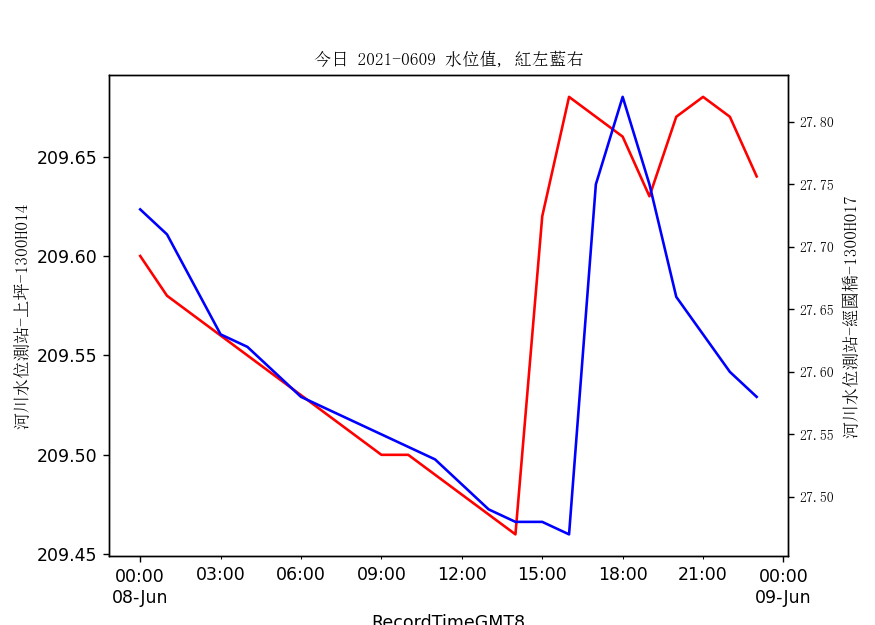

/Users/wuulong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/wuulong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [37]:
gd={}
#waterLevel_view()

waterLevel_load(gd,'2021-06-08')
#gd['waterLevel-station']

#waterLevel_plotA(gd, '1300H017')

river_pair=['河川水位測站-上坪-1300H014','河川水位測站-經國橋-1300H017'] 
waterLevel_plotB(gd, river_pair)

# 單雨量站+單水位站 混合圖

想觀察雨量站跟水位站的關係

In [233]:
def rain_load1(bag, date_str,reload=False):
    df_info = api_to_csv("rain-station",None)
    #date_str = date.today() # 2021-06-07
    print("Today is %s" %(date_str))
    df=api_to_csv("rain-rainData",[date_str,"23","25","121","122"],reload)

    df["timeGMT8"] = df['time'].apply(date_to_gmt8)
    df["timeGMT8"] = pd.to_datetime(df['timeGMT8'])

    df=df.merge(df_info, how='left', left_on='stationID', right_on='stationID')
    df=df.drop_duplicates(subset=["timeGMT8","stationID"],keep='last')   
    df['stationName']=df['city']  + '|' + df['town']  + '|' +  df['name'] + '|' + df['stationID']

    #filter, sort
    #df=df[df['now']>10] #可改雨量值, 有很多淹水資料時，改高一點比較不會太多
    df=df.sort_values(by=['timeGMT8','stationID'])
    
    bag['rain-station']=df_info
    bag['rain-rainData']=df
    
def rain_waterLevel_plot(bag,pair):

    %matplotlib notebook
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties
    
    #pair=['內灣國小',河川水位測站-內灣-1300H013']

    myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    #ax2 先做就正常 [FIXME]
    ax2.set_ylabel(pair[1],fontproperties=myfont)
    bag['df2'].plot(x='RecordTimeGMT8',y='WaterLevel',ax=ax2,label=pair[1],color='blue',legend=None)
    
    ax1.set_ylabel(pair[2+0],fontproperties=myfont) #,loc="top"
    bag['df1'].plot(x='timeGMT8',y='now',ax=ax1,label=pair[2+0],color='red',legend=None) #no need to specify for first axis




    title = "今日 %s 雨量/水位值, 紅左藍右" %(date_str)
    plt.title(title,fontproperties=myfont) 
    plt.xticks(fontname = 'SimSun',size=8)
    plt.yticks(fontname = 'SimSun',size=8)
    fig = plt.gcf()
    fig.set_size_inches(7.0, 5)
    plt.show  



rain-station: output/rain-station.csv saved, shape = (2149, 6)
Today is 2021-06-09
rain-rainData: output/rain-rainData_2021-06-09.csv saved, shape = (46782, 3)
waterLevel-station: output/waterLevel-station.csv saved, shape = (5176, 13)
waterLevel-waterLevelData: output/waterLevel-waterLevelData_2021-06-09.csv saved, shape = (4950, 3)


<IPython.core.display.Javascript object>


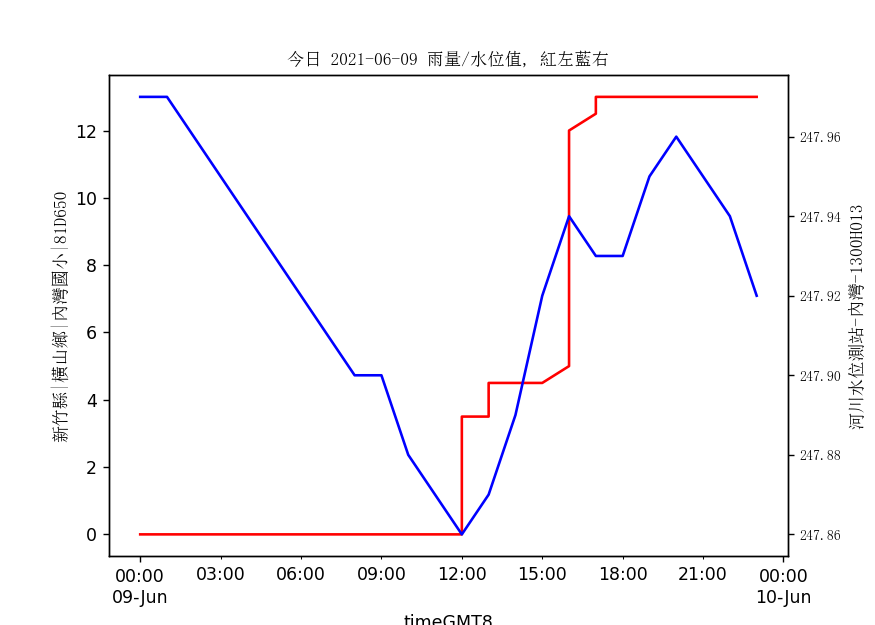

In [236]:
date_str='2021-06-09'
pair=['81D650','河川水位測站-內灣-1300H013'] #雨量站： 內灣國小 
#rain
rain_load1(gd,date_str,True)
df_rain = gd['rain-rainData']
df_rain_info = gd['rain-station']
gd['df1']=df_rain[df_rain['stationID']==pair[0]]

#waterLevel
waterLevel_load(gd,date_str,False)
df_waterLevel_info=gd['waterLevel-station']
df_waterLevel = gd['waterLevel-waterLevelData']

pair.append(get_value_by_index(df_rain,"stationID="+pair[0], 'stationName'))
pair.append(get_value_by_index(df_waterLevel_info,"ObservatoryName="+pair[1], 'BasinIdentifier'))

filter1 = df_waterLevel['BasinIdentifier']==pair[2+1]
gd['df2']=df_waterLevel[filter1]

rain_waterLevel_plot(gd,pair)
#gd['df1']
#df_rain_info

# 時間差變化

In [257]:
# 今日水位差

def mydiff(series):
    values = series.tolist()
    return max(values)-min(values)


def waterLevel_diff(bag,date_str,filter_def=None): #BasinIdentifier,RiverName,stationName
    waterLevel_load(gd,date_str,True)
    df_waterLevel_info=gd['waterLevel-station']
    df_waterLevel = gd['waterLevel-waterLevelData']
    #print(df_waterLevel.columns)

    if filter_def:
        cols=filter_def.split("=")
        #f1=df_waterLevel[cols[0]]==cols[1]
        f1=df_waterLevel[cols[0]].str.contains(cols[1], na=False) #RiverName 欄位值似乎有問題
        
        df=df_waterLevel[f1]
    else:
        df=df_waterLevel

    df_agg=df.groupby('stationName').agg({'WaterLevel': ['max',mydiff]})    
    return df_agg
                    



In [255]:
df_agg = waterLevel_diff(gd,date.today(),"RiverName=頭前溪") #"BasinIdentifier=1300H013"
df_agg.sort_values([('WaterLevel', 'mydiff')], ascending=False)

waterLevel-station: output/waterLevel-station.csv saved, shape = (5176, 13)
waterLevel-waterLevelData: output/waterLevel-waterLevelData_2021-06-12.csv saved, shape = (1605, 3)


WaterLevel       
                         max mydiff
stationName                        
1300H021|舊港橋            2.10   2.05
1580H015|頭前溪橋          23.16   0.10
1300H017|經國橋           27.34   0.03
1300H018|竹林大橋(左岸)      96.92   0.03
1300H016|竹林大橋         100.67   0.02

# 警示
geocode 可參考郵遞區號.csv

In [223]:
date_str=date.today()
df=api_to_csv("alert-alertData",[date_str])

if 0:
    #今日雨量
    station_city=['屏東縣','臺東縣']
    rain_day_max(gd,date.today(),station_city)  
    df_agg=gd['rain_day_max']
    print("今日 %s 最高雨量" %(station_city)) 
    print(df_agg.sort_values([('now', 'max')], ascending=False).head())
    
df

alert-alertData: output/alert-alertData_2021-06-12.csv saved, shape = (2, 14)
rain-station: output/rain-station.csv saved, shape = (2149, 6)
Today is 2021-06-12
rain-rainData: output/rain-rainData_2021-06-12.csv saved, shape = (50811, 3)
今日 ['屏東縣', '臺東縣'] 最高雨量
                       now
                       max
stationName               
臺東縣|太麻里鄉|多良|81S860    27.5
屏東縣|滿州鄉|檳榔|C0R280     24.0
屏東縣|滿州鄉|佳樂水|C0R680    21.5
臺東縣|綠島鄉|綠島|C0S730     21.5
臺東縣|太麻里鄉|賓茂國小|O1S660  19.0


,_id,certainty,description,effective,eventcode,expires,geocode,headline,msgType,polygon,responsetype,severity,severity_level,urgency
0,CWB-Weather_extremely-rain_202106120330001_0,Likely,\n對流雲系發展旺盛，易有短延時強降雨，今（１２）日恆春半島、臺東地區有局部大雨發生的機率，...,2021-06-12T03:30:00+08:00,rainfall,2021-06-12T11:00:00+08:00,"[1001411, 1001409, 1001408, 1001304, 1001405, ...",大雨特報,Update,[],Monitor,Moderate,大雨,Future
1,CWB-Weather_extremely-rain_202106120505001_0,Observed,\n由於降雨趨於緩和，發生大雨的機率降低，故解除大雨特報。\n,2021-06-12T05:05:00+08:00,rainfall,2021-06-12T05:19:31+08:00,"[10017, 63, 65, 68, 10018, 10004, 10005, 66, 1...",解除大雨特報,Cancel,[],{},Minor,{},Past
